In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('BlackFriday.csv', engine = 'python')
data.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422


In [3]:
len(data)

537577

In [4]:
data.drop(['Product_ID', 'Product_Category_2', 'Product_Category_3'], axis = 1, inplace = True)
data.rename({'User_ID':'user_id',
             'Gender':'gender',
             'Age':'age',
             'Occupation':'occupation',
             'City_Category':'city',
             'Stay_In_Current_City_Years':'years_in_city',
             'Marital_Status':'marital_status',
             'Product_Category_1':'product_category',
             'Purchase':'amount'}, axis='columns', inplace = True)
data['amount'] /= 15000
data.head(3)

,user_id,gender,age,occupation,city,years_in_city,marital_status,product_category,amount
0,1000001,F,0-17,10,A,2,0,3,0.558000
1,1000001,F,0-17,10,A,2,0,1,1.013333
2,1000001,F,0-17,10,A,2,0,12,0.094800


In [5]:
import matplotlib.pyplot as plt

Text(0.5,1,'Product Category')

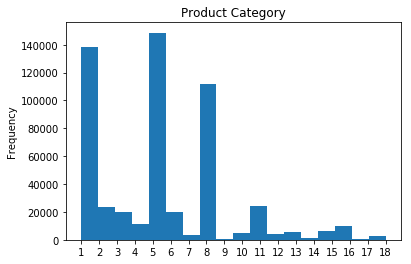

In [6]:
unique_cat = len(data.product_category.value_counts())

plt.hist(data.product_category, bins=unique_cat)
plt.ylabel('Frequency')
plt.xticks(range(1, unique_cat+1))
plt.title('Product Category')

In [7]:
import seaborn as sns

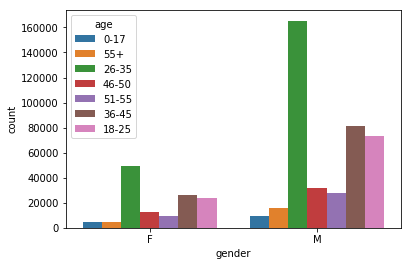

In [8]:
sns.countplot(x='gender', hue='age', data=data)

In [9]:
data = pd.get_dummies(data, columns=['product_category'], prefix = ['product_category'])
data.head(3)

,user_id,gender,age,occupation,city,years_in_city,marital_status,amount,product_category_1,product_category_2,...,product_category_9,product_category_10,product_category_11,product_category_12,product_category_13,product_category_14,product_category_15,product_category_16,product_category_17,product_category_18
0,1000001,F,0-17,10,A,2,0,0.558000,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1000001,F,0-17,10,A,2,0,1.013333,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1000001,F,0-17,10,A,2,0,0.094800,0,0,...,0,0,0,1,0,0,0,0,0,0


In [10]:
data = data.groupby('user_id').agg({'gender':lambda x:x.value_counts().index[0],
                             'age':lambda x:x.value_counts().index[0],
                             'occupation':lambda x:x.value_counts().index[0],
                             'city':lambda x:x.value_counts().index[0],
                             'years_in_city':lambda x:x.value_counts().index[0],
                             'marital_status':lambda x:x.value_counts().index[0],
                             'amount':'sum',
                             'product_category_1':'mean',
                             'product_category_2':'mean',
                             'product_category_3':'mean',
                             'product_category_4':'mean',
                             'product_category_5':'mean',
                             'product_category_6':'mean',
                             'product_category_7':'mean',
                             'product_category_8':'mean',
                             'product_category_9':'mean',
                             'product_category_10':'mean',
                             'product_category_11':'mean',
                             'product_category_12':'mean',
                             'product_category_13':'mean',
                             'product_category_14':'mean',
                             'product_category_15':'mean',
                             'product_category_16':'mean',
                             'product_category_17':'mean',
                             'product_category_18':'mean'})
data.head(3)

,gender,age,occupation,city,years_in_city,marital_status,amount,product_category_1,product_category_2,product_category_3,...,product_category_9,product_category_10,product_category_11,product_category_12,product_category_13,product_category_14,product_category_15,product_category_16,product_category_17,product_category_18
user_id,,,,,,,,,,,,,,,,,,,,,
1000001,F,0-17,10,A,2,0,22.232067,0.117647,0.029412,0.323529,...,0.0,0.0,0.0,0.088235,0.0,0.029412,0.0,0.029412,0.0,0.000000
1000002,M,55+,16,C,4+,0,54.023533,0.407895,0.013158,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
1000003,M,26-35,15,A,3,0,22.775667,0.517241,0.068966,0.034483,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.034483


Text(0.5,1,'Gender Frequency')

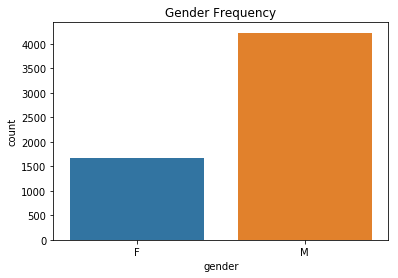

In [11]:
sns.countplot(x='gender', data=data).set_title('Gender Frequency')

In [12]:
data.gender.value_counts()

M    4225
F    1666
Name: gender, dtype: int64

Text(0.5,1,'Age Profile')

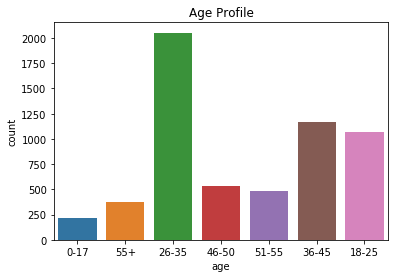

In [13]:
sns.countplot(x='age', data=data).set_title('Age Profile')

Text(0.5,1,'Spendings')

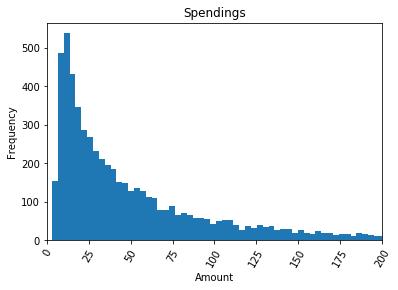

In [14]:
plt.figure()
plt.hist(data['amount'], bins = 200)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.xlim([0,200])
plt.xticks(rotation=60)
plt.title('Spendings')

In [15]:
print('Count',int(round(data.amount.count(),0)))
print('Mean',int(round(data.amount.mean(),0)))
print('Std',int(round(data.amount.std(),0)))
print('10% percentile',int(round(data.amount.quantile(0.1),0)))
print('90% percentile',int(round(data.amount.quantile(0.9),0)))
print('Min',int(round(data.amount.min())))
print('Max',int(round(data.amount.max())))

Count 5891
Mean 57
Std 62
10% percentile 10
90% percentile 135
Min 3
Max 702


Text(0.5,1,'Cities')

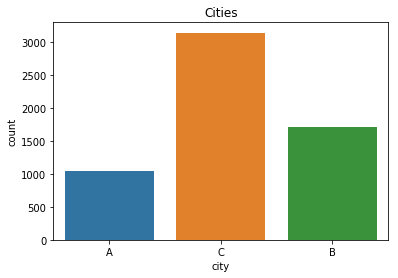

In [16]:
sns.countplot(x='city', data=data).set_title('Cities')

Text(0.5,1,'Gender Profile by City')

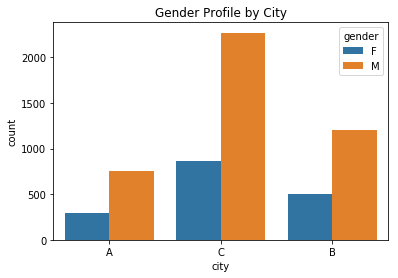

In [17]:
sns.countplot(x='city', hue='gender', data=data).set_title('Gender Profile by City')

Text(0.5,1,'Spendings in C')

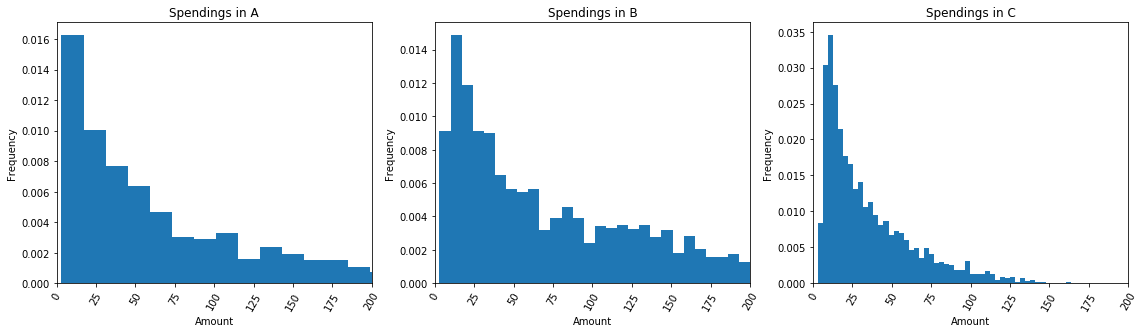

In [18]:
plt.figure(figsize=(19.2,4.8))

plt.subplot(1, 3, 1)
plt.hist(data['amount'].loc[data['city']=='A'], density=True, bins = 50)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.xlim([0,200])
plt.xticks(rotation=60)
plt.title('Spendings in A')

plt.subplot(1, 3, 2)
plt.hist(data['amount'].loc[data['city']=='B'], density=True, bins = 50)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.xlim([0,200])
plt.xticks(rotation=60)
plt.title('Spendings in B')

plt.subplot(1, 3, 3)
plt.hist(data['amount'].loc[data['city']=='C'], density=True, bins = 50)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.xlim([0,200])
plt.xticks(rotation=60)
plt.title('Spendings in C')

In [19]:
print('Mean spendings')
data.groupby('city')['amount'].agg('mean')

Mean spendings


city
A    82.658296
B    81.368155
C    34.800212
Name: amount, dtype: float64

In [20]:
print('Total spendings')
data.groupby('city')['amount'].agg('sum')

Total spendings


city
A     86377.9198
B    138895.4408
C    109237.8646
Name: amount, dtype: float64

In [21]:
data.occupation.value_counts()

4     740
0     688
7     669
1     517
17    491
12    376
14    294
20    273
2     256
16    235
6     228
10    192
3     170
15    140
13    140
11    128
5     111
9      88
19     71
18     67
8      17
Name: occupation, dtype: int64

Text(0.5,1,'Spending by Occupation')

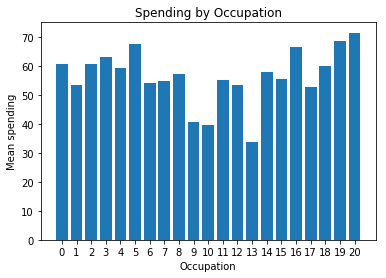

In [22]:
plt.figure()
means_by_occupation = []
for i in range(len(data.occupation.value_counts())):
    means_by_occupation.append(data.amount.loc[data.occupation == i].mean())
plt.bar(list(range(len(data.occupation.value_counts()))), means_by_occupation)
plt.xticks(list(range(len(data.occupation.value_counts()))))
plt.xlabel('Occupation')
plt.ylabel('Mean spending')
plt.title('Spending by Occupation')

In [23]:
data.marital_status.value_counts()

0    3417
1    2474
Name: marital_status, dtype: int64

Text(0.5,1,'Spending by Marital Spending')

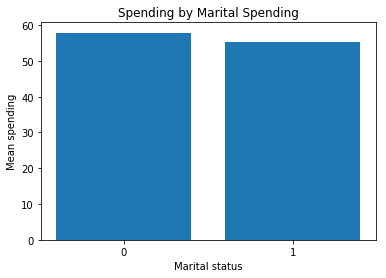

In [24]:
plt.figure()
means_by_marital_status = []
for i in range(len(data.marital_status.value_counts())):
    means_by_marital_status.append(data.amount.loc[data.marital_status == i].mean())
plt.bar(list(range(len(data.marital_status.value_counts()))), means_by_marital_status)
plt.xticks(list(range(len(data.marital_status.value_counts()))))
plt.xlabel('Marital status')
plt.ylabel('Mean spending')
plt.title('Spending by Marital Spending')

In [25]:
data = pd.get_dummies(data, columns=['age'], prefix = ['age'])
data = pd.get_dummies(data, columns=['occupation'], prefix = ['occupation'])
data = pd.get_dummies(data, columns=['city'], prefix = ['city'])
data.head(3)

,gender,years_in_city,marital_status,amount,product_category_1,product_category_2,product_category_3,product_category_4,product_category_5,product_category_6,...,occupation_14,occupation_15,occupation_16,occupation_17,occupation_18,occupation_19,occupation_20,city_A,city_B,city_C
user_id,,,,,,,,,,,,,,,,,,,,,
1000001,F,2,0,22.232067,0.117647,0.029412,0.323529,0.058824,0.058824,0.029412,...,0,0,0,0,0,0,0,1,0,0
1000002,M,4+,0,54.023533,0.407895,0.013158,0.000000,0.000000,0.171053,0.078947,...,0,0,1,0,0,0,0,0,0,1
1000003,M,3,0,22.775667,0.517241,0.068966,0.034483,0.000000,0.310345,0.000000,...,0,1,0,0,0,0,0,1,0,0


In [26]:
data.gender = data.gender.map({'F':0, 'M':1})
data.drop('years_in_city', axis = 1, inplace =  True)
data.head(3)

,gender,marital_status,amount,product_category_1,product_category_2,product_category_3,product_category_4,product_category_5,product_category_6,product_category_7,...,occupation_14,occupation_15,occupation_16,occupation_17,occupation_18,occupation_19,occupation_20,city_A,city_B,city_C
user_id,,,,,,,,,,,,,,,,,,,,,
1000001,0,0,22.232067,0.117647,0.029412,0.323529,0.058824,0.058824,0.029412,0.0,...,0,0,0,0,0,0,0,1,0,0
1000002,1,0,54.023533,0.407895,0.013158,0.000000,0.000000,0.171053,0.078947,0.0,...,0,0,1,0,0,0,0,0,0,1
1000003,1,0,22.775667,0.517241,0.068966,0.034483,0.000000,0.310345,0.000000,0.0,...,0,1,0,0,0,0,0,1,0,0


Text(0.5,1,'Category Popularity in City C')

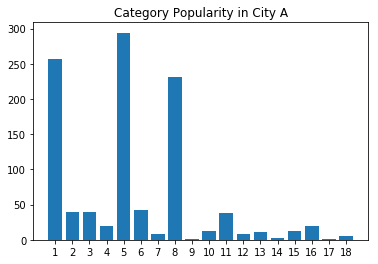

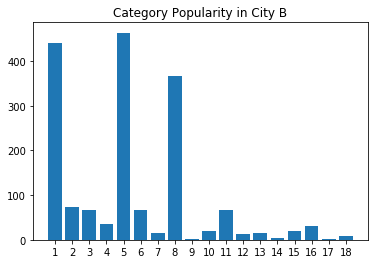

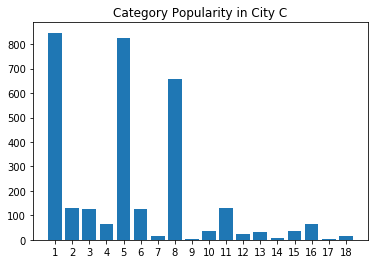

In [27]:
plt.figure()
plt.bar(range(1, 19), data[data.columns[3:21]].loc[data.city_A == 1].sum())
plt.xticks(range(1, 19))
plt.title('Category Popularity in City A')

plt.figure()
plt.bar(range(1, 19), data[data.columns[3:21]].loc[data.city_B == 1].sum())
plt.xticks(range(1, 19))
plt.title('Category Popularity in City B')

plt.figure()
plt.bar(range(1, 19), data[data.columns[3:21]].loc[data.city_C == 1].sum())
plt.xticks(range(1, 19))
plt.title('Category Popularity in City C')

Text(0.5,1,'Category Popularity, Male')

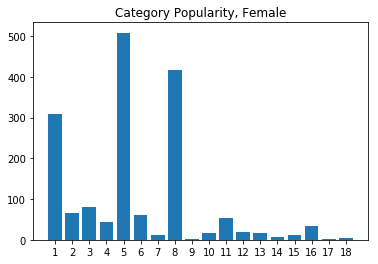

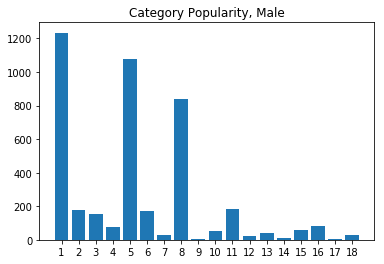

In [28]:
plt.figure()
plt.bar(range(1, 19), data[data.columns[3:21]].loc[data.gender == 0].sum())
plt.xticks(range(1, 19))
plt.title('Category Popularity, Female')

plt.figure()
plt.bar(range(1, 19), data[data.columns[3:21]].loc[data.gender == 1].sum())
plt.xticks(range(1, 19))
plt.title('Category Popularity, Male')

In [29]:
columns_to_merge = [4, 5, 6, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
data.columns[columns_to_merge]

Index(['product_category_2', 'product_category_3', 'product_category_4',
       'product_category_6', 'product_category_7', 'product_category_9',
       'product_category_10', 'product_category_11', 'product_category_12',
       'product_category_13', 'product_category_14', 'product_category_15',
       'product_category_16', 'product_category_17', 'product_category_18'],
      dtype='object')

In [30]:
data['product_category_other'] = data[data.columns[columns_to_merge]].sum(axis=1)
data.drop(data.columns[columns_to_merge], axis=1, inplace = True)
data.head(3)

,gender,marital_status,amount,product_category_1,product_category_5,product_category_8,age_0-17,age_18-25,age_26-35,age_36-45,...,occupation_15,occupation_16,occupation_17,occupation_18,occupation_19,occupation_20,city_A,city_B,city_C,product_category_other
user_id,,,,,,,,,,,,,,,,,,,,,
1000001,0,0,22.232067,0.117647,0.058824,0.235294,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.588235
1000002,1,0,54.023533,0.407895,0.171053,0.328947,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0.092105
1000003,1,0,22.775667,0.517241,0.310345,0.034483,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0.137931


In [31]:
data = data[data.columns[list(range(3))+list(range(6, 37))+list(range(3,6))+[37]]]
data.head(1)

,gender,marital_status,amount,age_0-17,age_18-25,age_26-35,age_36-45,age_46-50,age_51-55,age_55+,...,occupation_18,occupation_19,occupation_20,city_A,city_B,city_C,product_category_1,product_category_5,product_category_8,product_category_other
user_id,,,,,,,,,,,,,,,,,,,,,
1000001,0,0,22.232067,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0.117647,0.058824,0.235294,0.588235


In [32]:
for i in range(len(data.columns)):
    print(i, data.columns[i])

0 gender
1 marital_status
2 amount
3 age_0-17
4 age_18-25
5 age_26-35
6 age_36-45
7 age_46-50
8 age_51-55
9 age_55+
10 occupation_0
11 occupation_1
12 occupation_2
13 occupation_3
14 occupation_4
15 occupation_5
16 occupation_6
17 occupation_7
18 occupation_8
19 occupation_9
20 occupation_10
21 occupation_11
22 occupation_12
23 occupation_13
24 occupation_14
25 occupation_15
26 occupation_16
27 occupation_17
28 occupation_18
29 occupation_19
30 occupation_20
31 city_A
32 city_B
33 city_C
34 product_category_1
35 product_category_5
36 product_category_8
37 product_category_other


In [33]:
#to_drop = data.columns[list(range(13, 34))]
#df = data.drop(to_drop, axis=1)

to_keep = data.columns[[2]+list(range(31,34))]
df = data[to_keep]
df.columns

Index(['amount', 'city_A', 'city_B', 'city_C'], dtype='object')

In [34]:
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import normalize, MinMaxScaler

import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [35]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(df)
data_norm = scaler.transform(df)
print(data_norm[:10])

range_n_clusters = list(range(2, 11))
for n_clusters in range_n_clusters:

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_norm)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_norm, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is:", silhouette_avg)

[[0.02757857 1.         0.         0.        ]
 [0.07302666 0.         0.         1.        ]
 [0.02835569 1.         0.         0.        ]
 [0.01542781 0.         1.         0.        ]
 [0.07404146 1.         0.         0.        ]
 [0.03195963 1.         0.         0.        ]
 [0.01813827 0.         1.         0.        ]
 [0.07171069 0.         0.         1.        ]
 [0.05240341 0.         0.         1.        ]
 [0.20255826 0.         1.         0.        ]]
For n_clusters = 2 The average silhouette_score is: 0.7440266961654828
For n_clusters = 3 The average silhouette_score is: 0.9464193940149874
For n_clusters = 4 The average silhouette_score is: 0.8710040576222282
For n_clusters = 5 The average silhouette_score is: 0.8348995509793884
For n_clusters = 6 The average silhouette_score is: 0.6759359980011473
For n_clusters = 7 The average silhouette_score is: 0.6696789377598534
For n_clusters = 8 The average silhouette_score is: 0.6614289277864668
For n_clusters = 9 The average s

In [36]:
model = KMeans(n_clusters=3, random_state=10)
cluster_labels = model.fit_predict(df)
centers = model.cluster_centers_

In [37]:
pd.options.display.float_format = '{:,.2f}'.format

clustering_results = pd.DataFrame(centers, columns = df.columns)
clustering_results = clustering_results.T
clustering_results

,0,1,2
amount,107.98,247.38,27.13
city_A,0.21,0.41,0.15
city_B,0.45,0.59,0.22
city_C,0.33,0.00,0.63


In [38]:
prod_cat_part = data[data.columns[list(range(34,38))]]
prod_cat_part.head(3)

,product_category_1,product_category_5,product_category_8,product_category_other
user_id,,,,
1000001,0.12,0.06,0.24,0.59
1000002,0.41,0.17,0.33,0.09
1000003,0.52,0.31,0.03,0.14


In [39]:
labels = []
output_for_nn = []
for i in range(len(prod_cat_part)):
    col_to_pick = np.where(prod_cat_part.iloc[i] == prod_cat_part.iloc[i].max(axis=0))[0][0]
    labels.append(col_to_pick)
    
    out = np.zeros(4)
    out[col_to_pick] = 1
    output_for_nn.append(out)

print(labels[:10])
output_for_nn = np.array(output_for_nn)
print(output_for_nn[0])

[3, 0, 0, 0, 2, 3, 0, 2, 2, 1]
[0. 0. 0. 1.]


In [40]:
X = data.drop(data.columns[list(range(34,38))], axis=1)
X.head(3)

,gender,marital_status,amount,age_0-17,age_18-25,age_26-35,age_36-45,age_46-50,age_51-55,age_55+,...,occupation_14,occupation_15,occupation_16,occupation_17,occupation_18,occupation_19,occupation_20,city_A,city_B,city_C
user_id,,,,,,,,,,,,,,,,,,,,,
1000001,0,0,22.23,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000002,1,0,54.02,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1000003,1,0,22.78,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [41]:
y = labels

In [42]:
from sklearn.model_selection import train_test_split
from sklearn import tree

In [43]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X)
X_norm = scaler.transform(X)
print(X_norm[:10])

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.33, random_state=42)
print(len(X_train))
print(len(X_test))

[[0.         0.         0.02757857 1.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.        ]
 [1.         0.         0.07302666 0.         0.         0.
  0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.         0.         0.
  0.         0.         0.         1.        ]
 [1.         0.         0.02835569 0.         0.         1.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.         0.         0.
  0.  

In [44]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [45]:
y_predict = clf.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
accuracy_score(y_test, y_predict)

0.2997429305912596

In [59]:
y = output_for_nn
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.33, random_state=42)
print(len(X_train))
print(len(X_test))

3946
1945


In [48]:
import tensorflow as tf
from tensorflow.keras import layers

C:\Work\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [87]:
model = tf.keras.models.Sequential()
#adding an input layer and the first hidden layer
model.add(layers.Dense(units=34, activation = 'relu'))
model.add(layers.Dense(16, activation = 'relu'))
#Adding the output layer
#if you dependent variable is more than 1 categorie use softmax as the activation function, the ouput dim will also be your number of features
model.add(layers.Dense(4, activation = 'softmax'))

In [88]:
#Compiling the ANN
#categorical_crossentropy
model.compile(optimizer = tf.train.GradientDescentOptimizer(0.1), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [90]:
#Fitting the ANN to the traning set
model.fit(X_train,y_train,batch_size=20 ,nb_epoch=200)

Epoch 1/200
3946/3946 [==============================] - 0s 57us/step - loss: 1.3267 - acc: 0.3639
Epoch 2/200
3946/3946 [==============================] - 0s 73us/step - loss: 1.3176 - acc: 0.3728
Epoch 3/200
3946/3946 [==============================] - 0s 72us/step - loss: 1.3127 - acc: 0.3756
Epoch 4/200
3946/3946 [==============================] - 0s 78us/step - loss: 1.3094 - acc: 0.3705
Epoch 5/200
3946/3946 [==============================] - 0s 74us/step - loss: 1.3050 - acc: 0.3789
Epoch 6/200
3946/3946 [==============================] - 0s 67us/step - loss: 1.3030 - acc: 0.3796
Epoch 7/200
3946/3946 [==============================] - 0s 73us/step - loss: 1.2992 - acc: 0.3880
Epoch 8/200
3946/3946 [==============================] - 0s 74us/step - loss: 1.2988 - acc: 0.3844
Epoch 9/200
3946/3946 [==============================] - 0s 73us/step - loss: 1.2952 - acc: 0.3923
Epoch 10/200
3946/3946 [==============================] - 0s 72us/step - loss: 1.2937 - acc: 0.3885
Epoch 11/

3946/3946 [==============================] - 0s 67us/step - loss: 1.1368 - acc: 0.4807
Epoch 164/200
3946/3946 [==============================] - 0s 72us/step - loss: 1.1306 - acc: 0.4883
Epoch 165/200
3946/3946 [==============================] - 0s 71us/step - loss: 1.1301 - acc: 0.4787
Epoch 166/200
3946/3946 [==============================] - 0s 70us/step - loss: 1.1299 - acc: 0.4894
Epoch 167/200
3946/3946 [==============================] - 0s 71us/step - loss: 1.1308 - acc: 0.4856
Epoch 168/200
3946/3946 [==============================] - 0s 72us/step - loss: 1.1298 - acc: 0.4838
Epoch 169/200
3946/3946 [==============================] - 0s 73us/step - loss: 1.1287 - acc: 0.4904
Epoch 170/200
3946/3946 [==============================] - 0s 72us/step - loss: 1.1273 - acc: 0.4881
Epoch 171/200
3946/3946 [==============================] - 0s 71us/step - loss: 1.1251 - acc: 0.4823
Epoch 172/200
3946/3946 [==============================] - 0s 72us/step - loss: 1.1306 - acc: 0.4790
Epoc

In [91]:
y_pred = model.predict(X_test)

In [92]:
labels_pred = []
for item in y_pred:
    labels_pred.append(np.argmax(item))
labels_pred = np.array(labels_pred)
print(labels_pred[0])

3


In [93]:
labels_test = []
for item in y_test:
    labels_test.append(np.argmax(item))
labels_test = np.array(labels_test)
print(labels_test[0])

1


In [94]:
accuracy_score(labels_test, labels_pred)

0.29048843187660667

In [108]:
y = labels
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.33, random_state=42)
print(len(X_train))
print(len(X_test))

3946
1945


In [109]:
from sklearn.neighbors import KNeighborsClassifier

In [110]:
knn = KNeighborsClassifier(n_neighbors=3)

In [111]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [112]:
y_pred = knn.predict(X_test)

In [113]:
accuracy_score(y_pred, y_test)

0.30231362467866324